In [1]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle

Load in the files

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/'

First, the FUV files

In [3]:
spec_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new.fits')
nodes_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_nodes.fits')
ids_fits_fuv = fits.open(rootdir + 'FUV/PG1522+101_FUV_wavecal_new_identifications.fits')
lsf_fits_fuv = fits.open(rootdir + 'FUV/PG1522_COS_FUV_wavcal2022_lsf_ZQ.fits')

Then, the NUV files

In [4]:
spec_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new.fits')
nodes_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_nodes.fits')
ids_fits_nuv = fits.open(rootdir + 'G185M/PG1522+101_NUV_wavecal_new_identifications.fits')
lsf_fits_nuv = fits.open(rootdir + 'G185M/PG1522_COS_NUV_wavcal2022_lsf.fits')

Then, the STIS files

In [5]:
spec_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new.fits')
nodes_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_nodes.fits')
ids_fits_stis = fits.open(rootdir + 'STIS/PG1522+101_E230M_new_identifications.fits')
lsf_fits_stis = fits.open(rootdir + 'STIS/PG1522_STIS_NUV_wavcal2022_lsf.fits')

Compile a list of the spectra, continuum nodes, and IDs for all detectors

In [6]:
spec_fits_list = [spec_fits_fuv, spec_fits_nuv, spec_fits_stis]
nodes_fits_list = [nodes_fits_fuv, nodes_fits_nuv, nodes_fits_stis]
ids_fits_list = [ids_fits_fuv, ids_fits_nuv, ids_fits_stis]
lsf_fits_list = [lsf_fits_fuv, lsf_fits_nuv, lsf_fits_stis]

Load in the ions table for atomic data

In [7]:
atomic_data_table = np.loadtxt('/Users/thepoetoftwilight/Documents/CUBS/pabs0/data/linelists/atom.dat', dtype=str)

# HI

## HI 1025 
Get HI 1025 from COS FUV

In [60]:
hi_1025_fuv = ion_transition('HI1025', 82, 'FUV')

In [61]:
hi_1025_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=0)

In [67]:
hi_1025_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [68]:
hi_1025_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

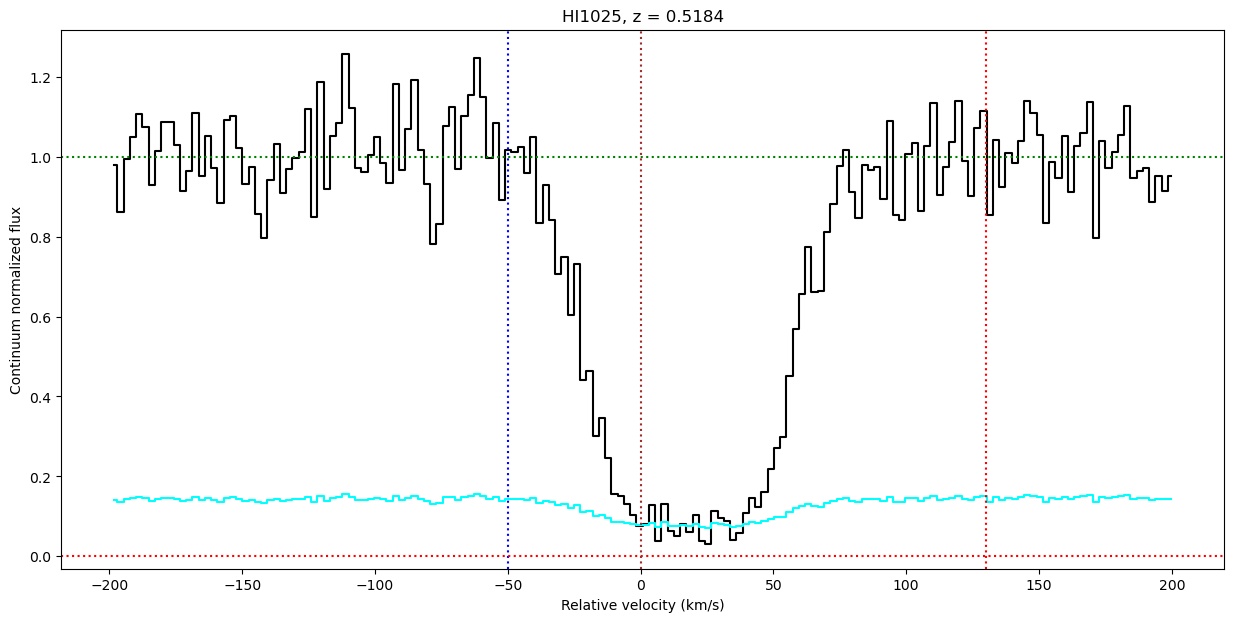

In [69]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_1025_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [70]:
hi_1025_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [71]:
hi_1025_fuv.init_multi_voigt(init_values = np.array([[14.2,10,0]]), 
                             lsf_convolve = True)

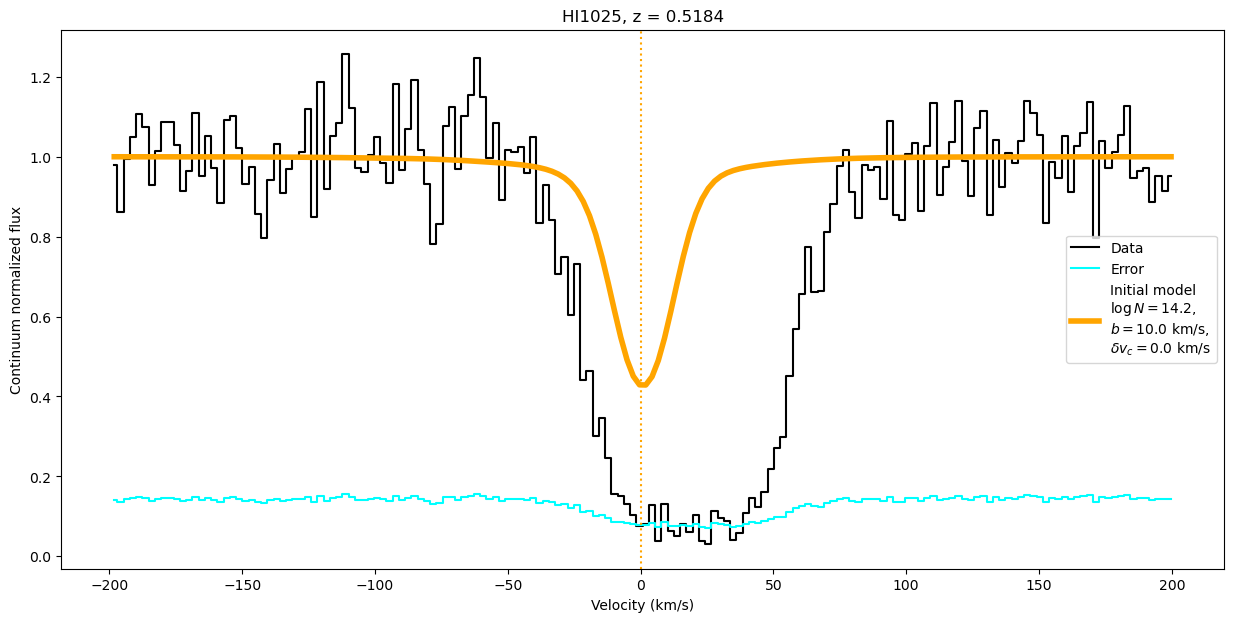

In [72]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_1025_fuv.plot_init_profile(ax, legend=True)

In [73]:
hi_1025_fuv.fit_multi_voigt()

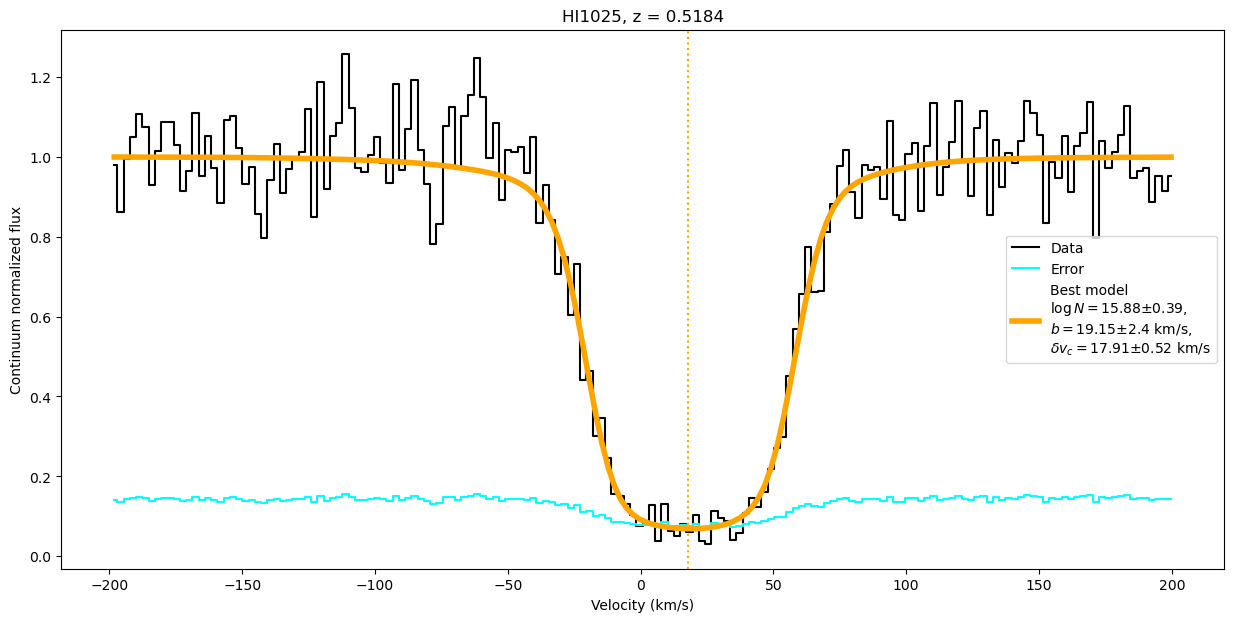

In [74]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_1025_fuv.plot_best_profile(ax, legend=True)

## HI 972
Get HI 972 from COS FUV

In [27]:
hi_972_fuv = ion_transition('HI972', 82, 'FUV')

In [39]:
hi_972_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=10)

In [40]:
hi_972_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [41]:
hi_972_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

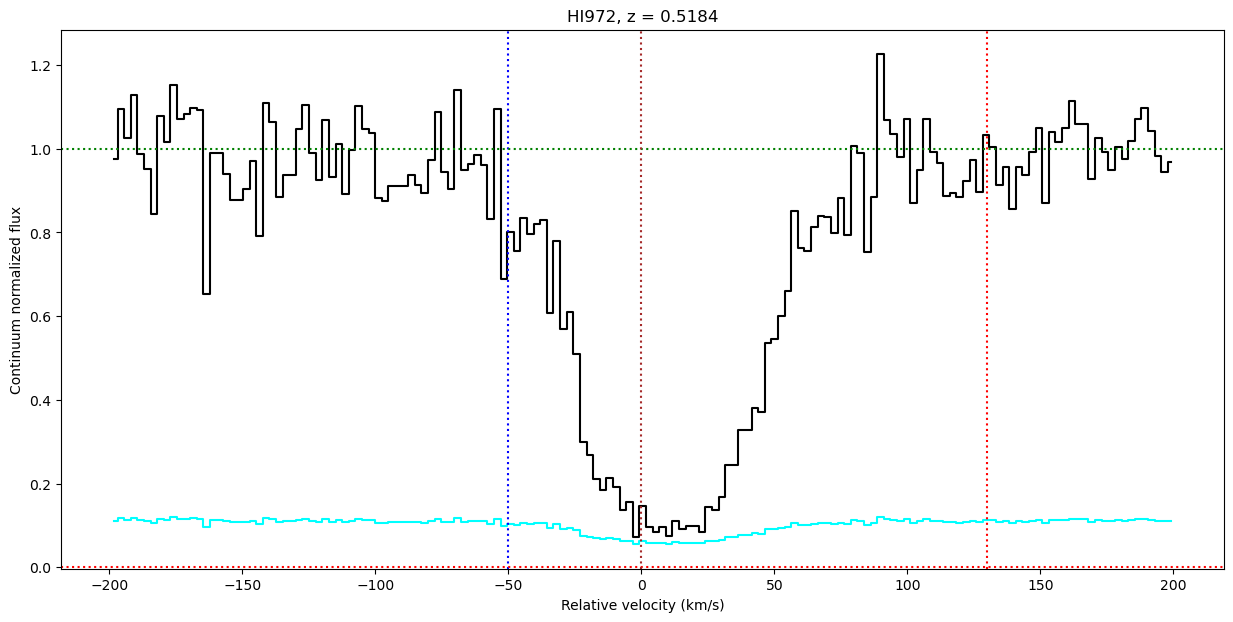

In [42]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_972_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [43]:
hi_972_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [56]:
hi_972_fuv.init_multi_voigt(init_values = np.array([[15.2,20,0]]), 
                             lsf_convolve = True)

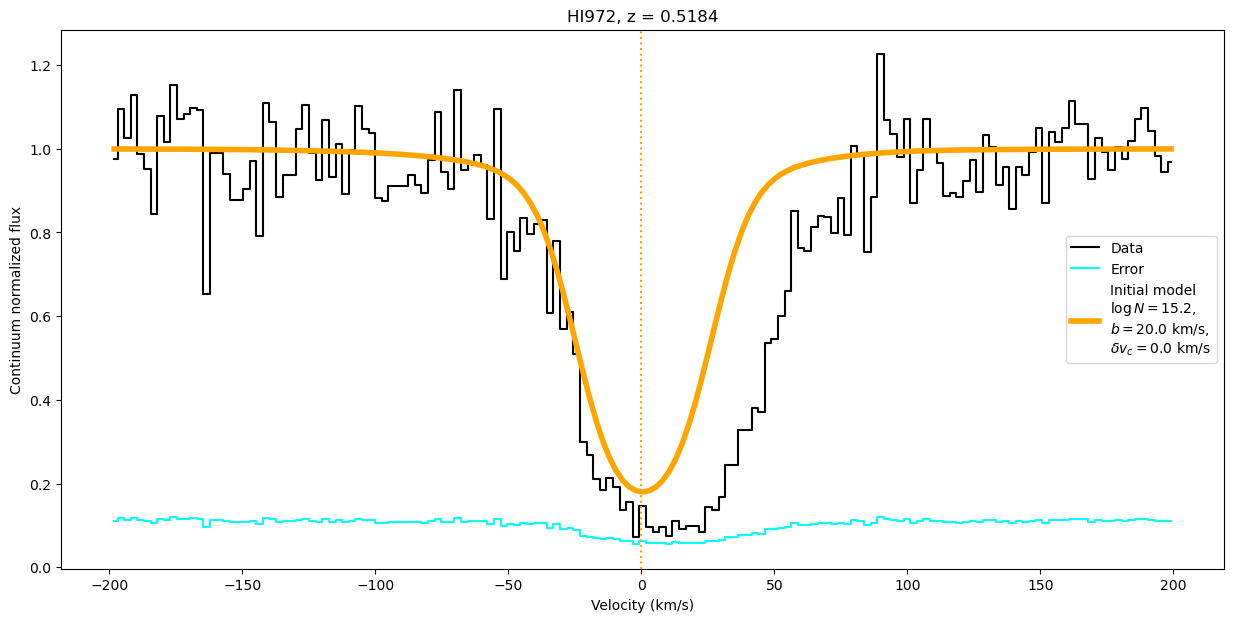

In [57]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_972_fuv.plot_init_profile(ax, legend=True)

In [58]:
hi_972_fuv.fit_multi_voigt()

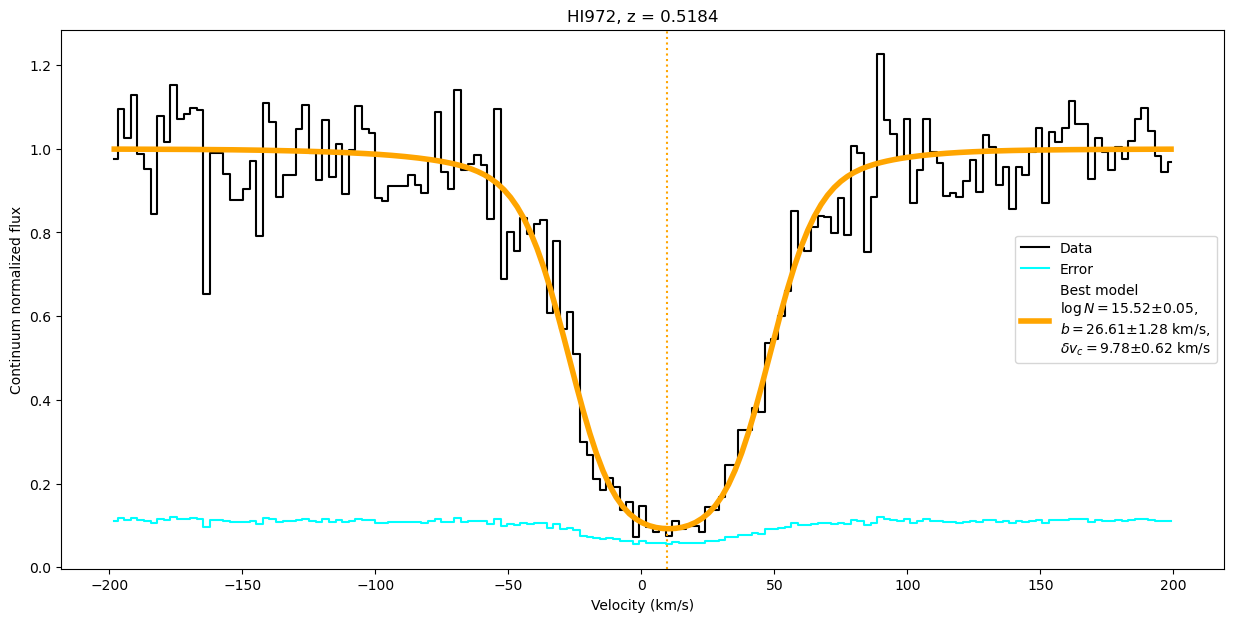

In [59]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_972_fuv.plot_best_profile(ax, legend=True)

## HI 949
Get HI 949 from COS FUV

In [75]:
hi_949_fuv = ion_transition('HI949', 82, 'FUV')

In [76]:
hi_949_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=10)

In [77]:
hi_949_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [78]:
hi_949_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

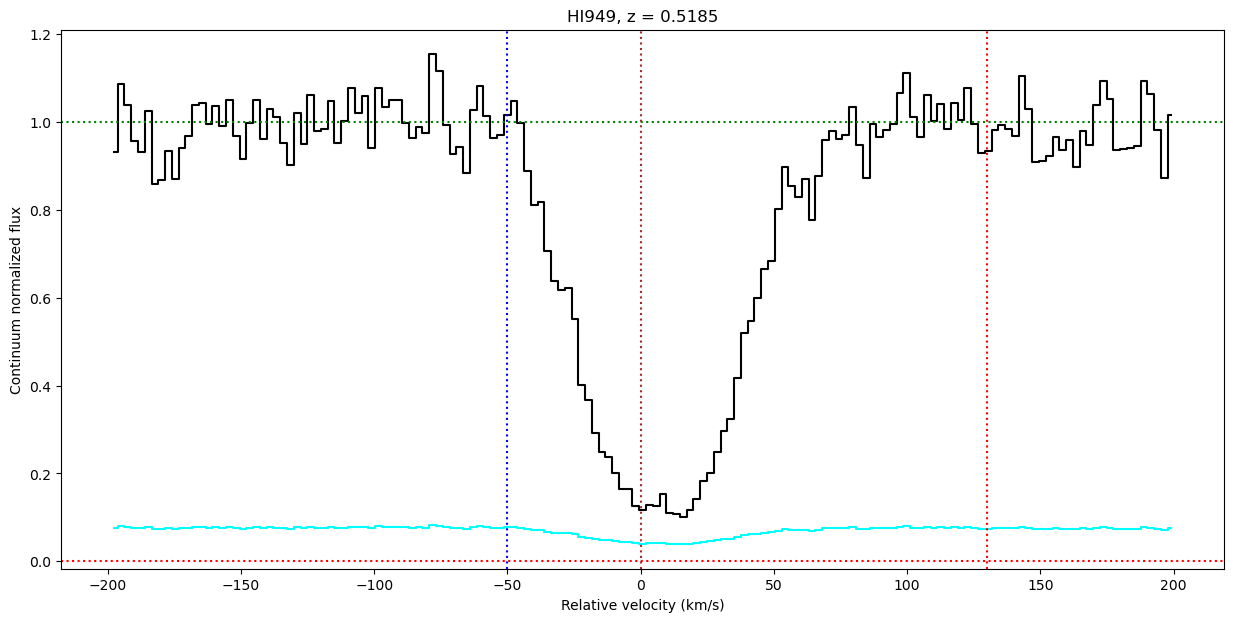

In [79]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_949_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [80]:
hi_949_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [89]:
hi_949_fuv.init_multi_voigt(init_values = np.array([[15.2,20,0]]), 
                             lsf_convolve = True)

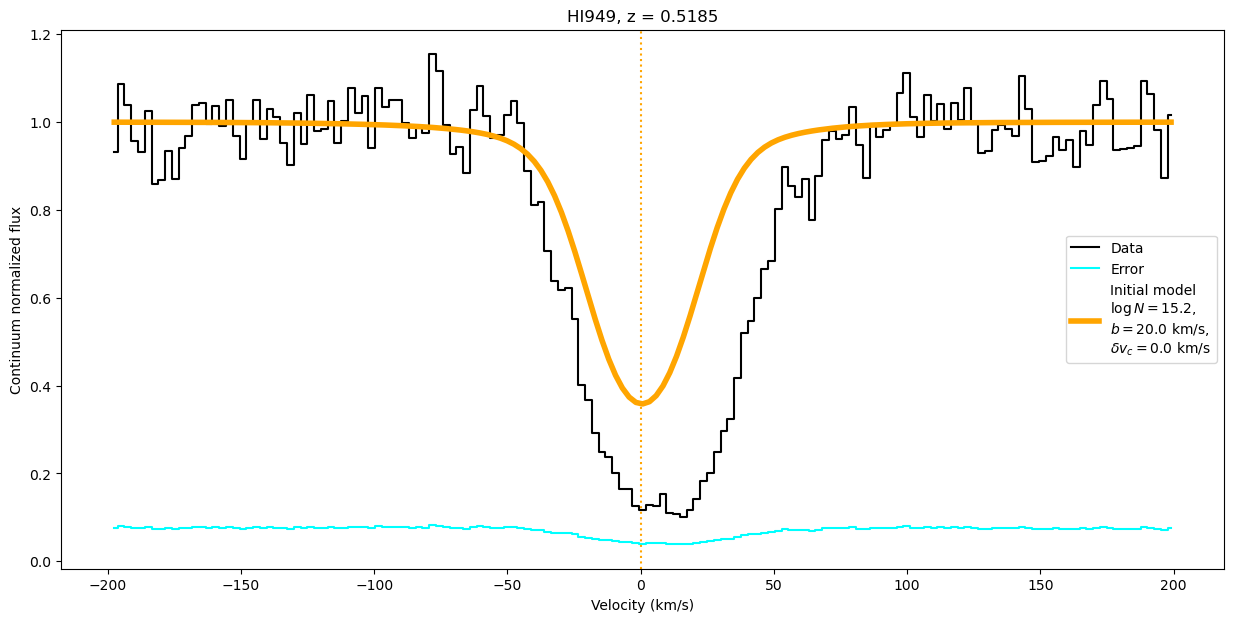

In [90]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_949_fuv.plot_init_profile(ax, legend=True)

In [91]:
hi_949_fuv.fit_multi_voigt()

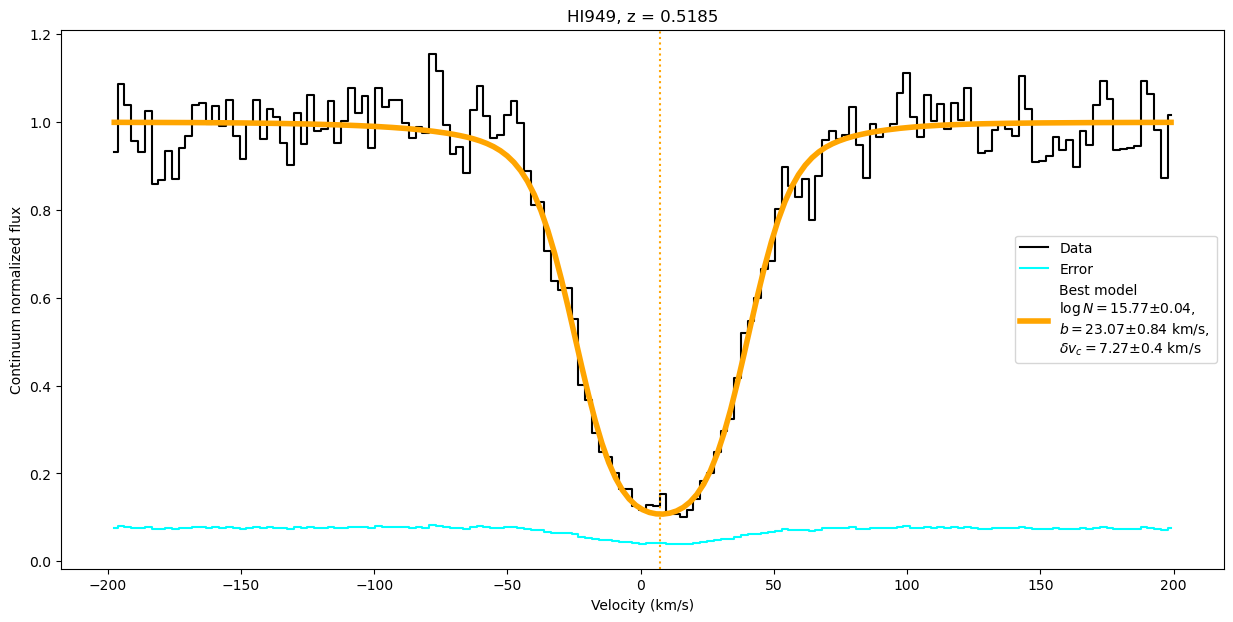

In [92]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_949_fuv.plot_best_profile(ax, legend=True)

## HI 937
Get HI 937 from COS FUV

In [93]:
hi_937_fuv = ion_transition('HI937', 82, 'FUV')

In [94]:
hi_937_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=0)

In [110]:
hi_937_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-100,-35]])

In [111]:
hi_937_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

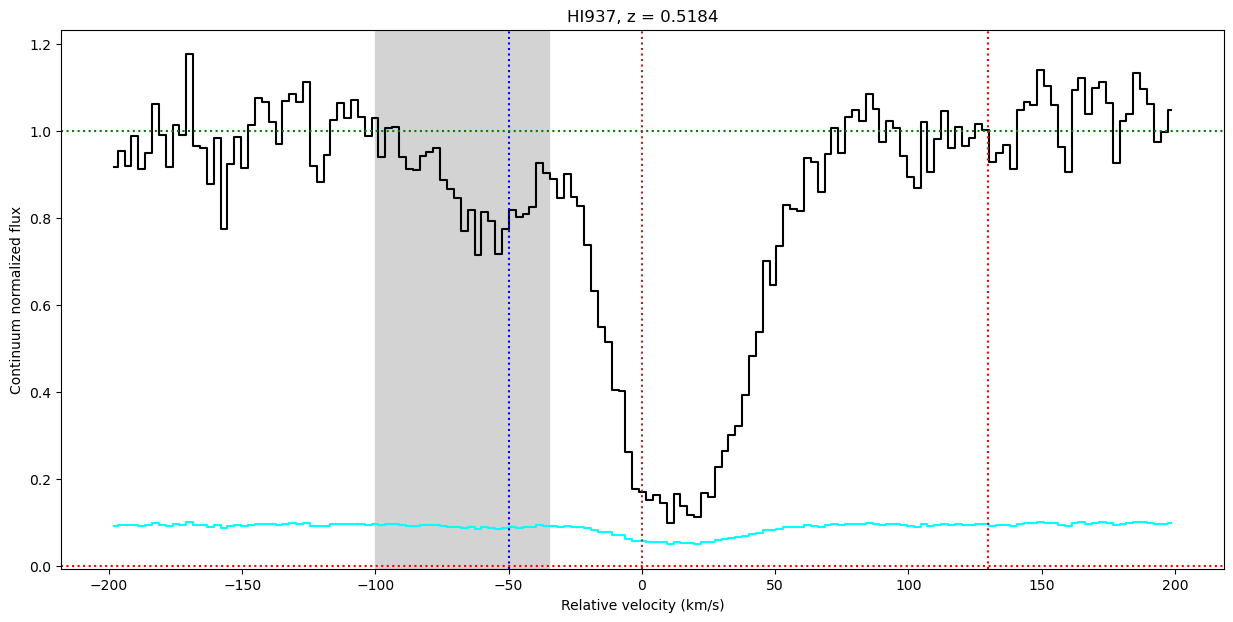

In [112]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_937_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [116]:
hi_937_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [117]:
hi_937_fuv.init_multi_voigt(init_values = np.array([[15.2,20,0]]), 
                             lsf_convolve = True)

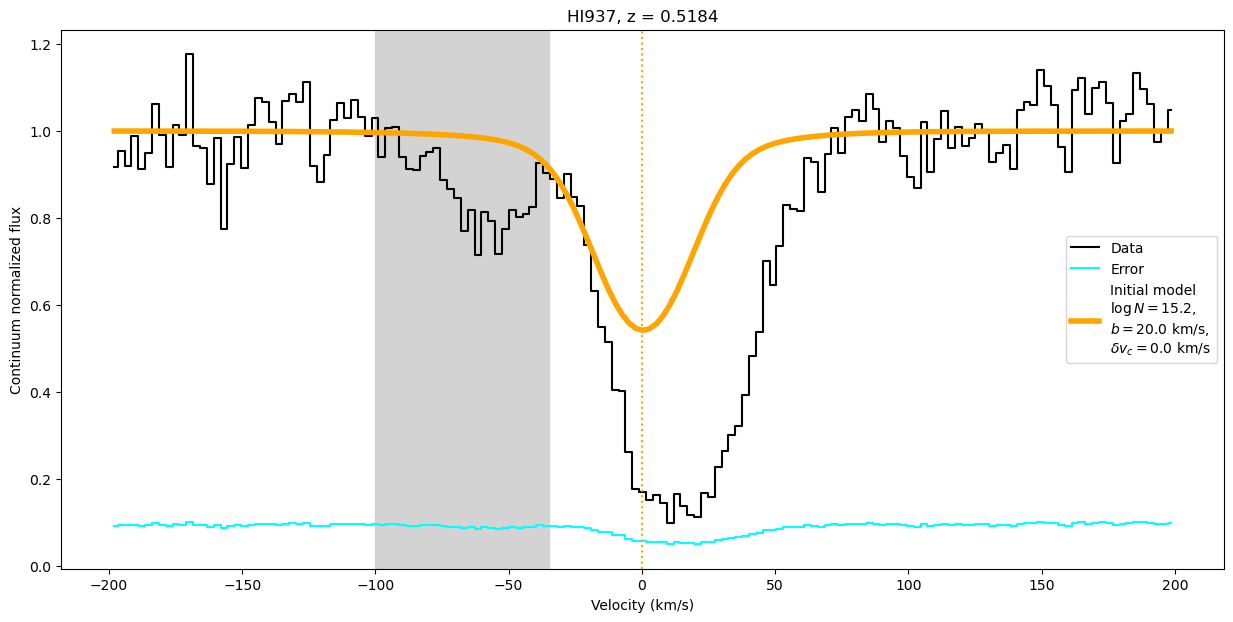

In [118]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_937_fuv.plot_init_profile(ax, legend=True)

In [119]:
hi_937_fuv.fit_multi_voigt()

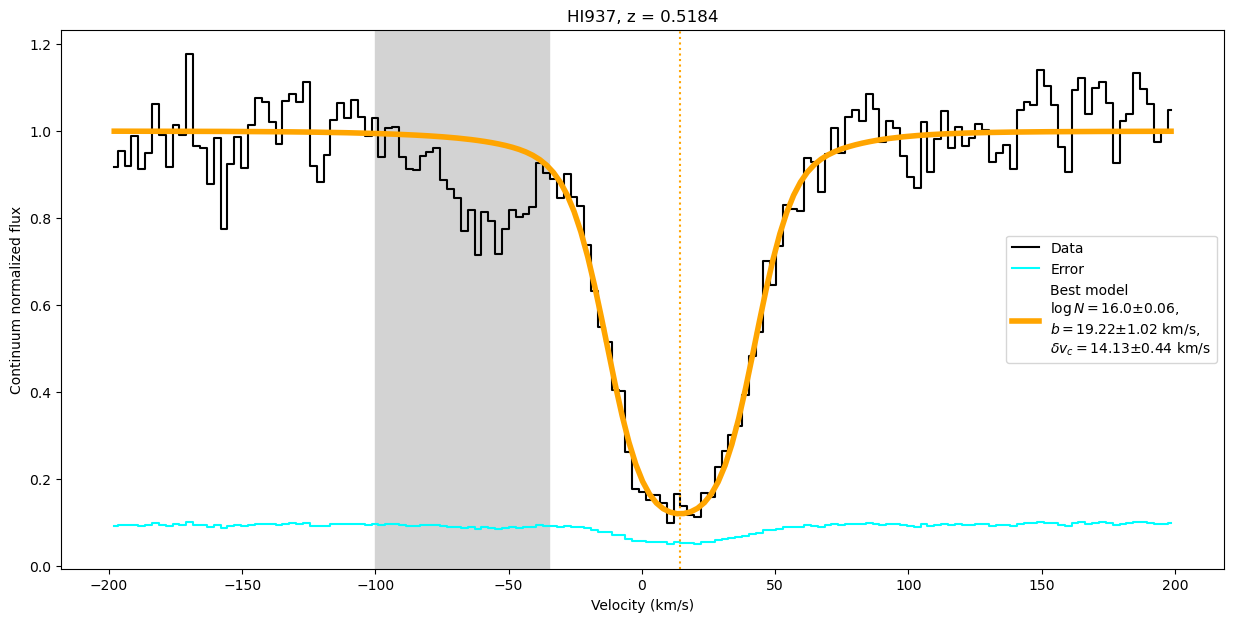

In [120]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_937_fuv.plot_best_profile(ax, legend=True)

## HI 926
Get HI 926 from COS FUV

In [121]:
hi_926_fuv = ion_transition('HI926', 82, 'FUV')

In [122]:
hi_926_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=0)

In [123]:
hi_926_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [124]:
hi_926_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

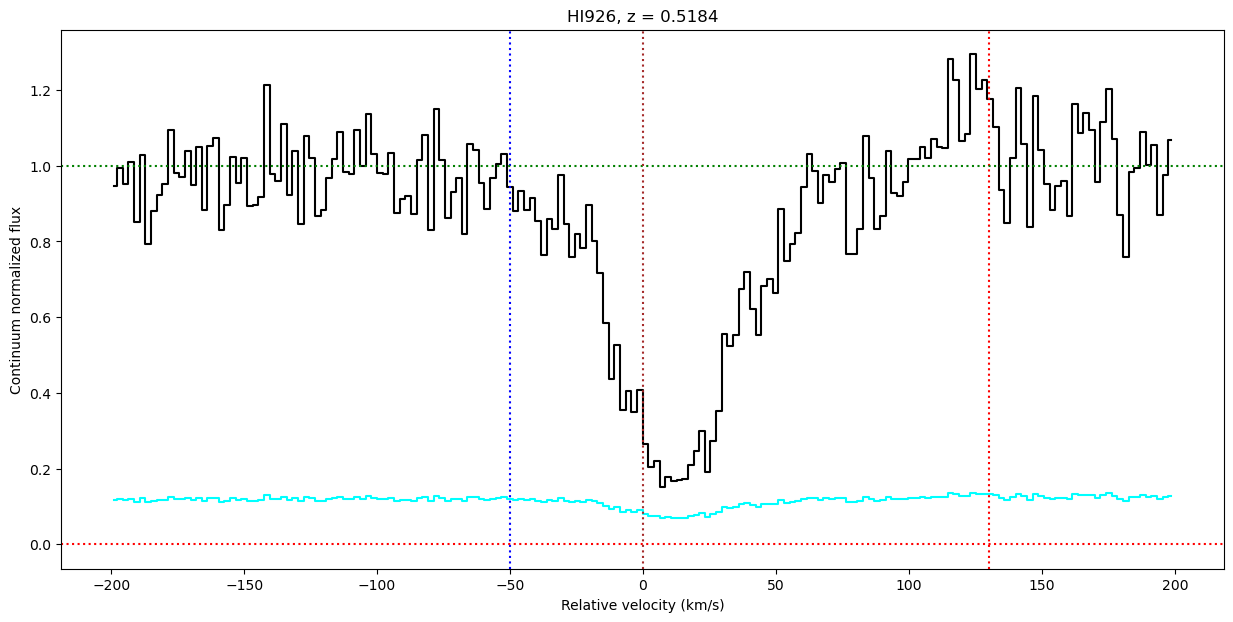

In [125]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_926_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [126]:
hi_926_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [127]:
hi_926_fuv.init_multi_voigt(init_values = np.array([[15.2,20,0]]), 
                             lsf_convolve = True)

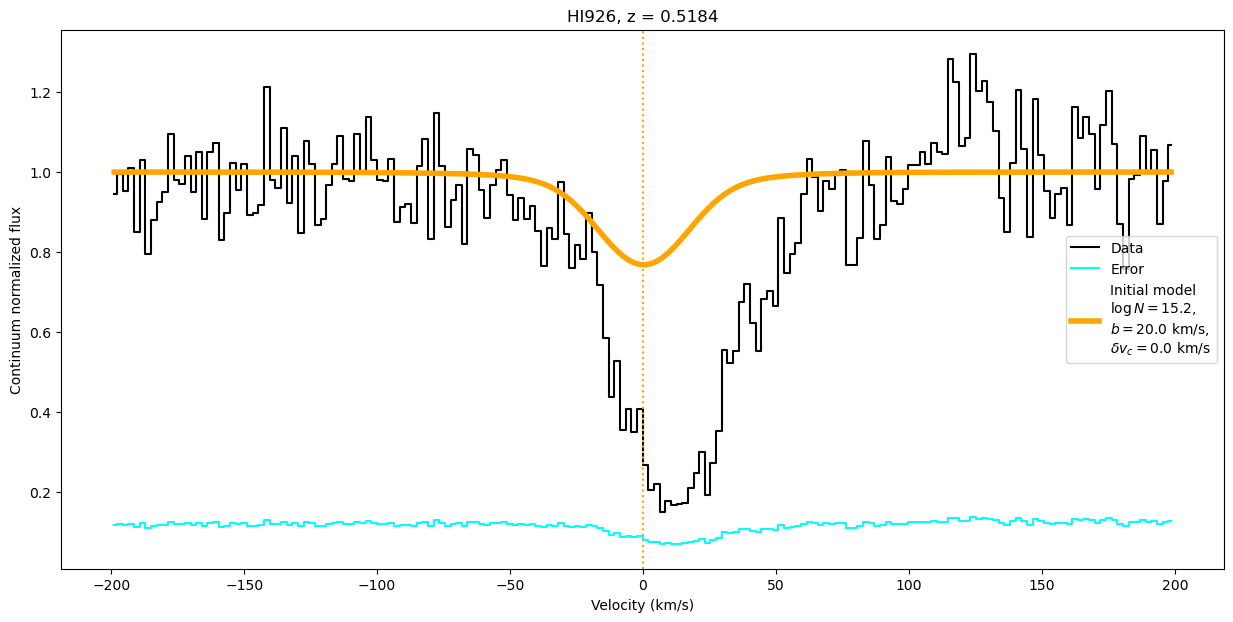

In [128]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_926_fuv.plot_init_profile(ax, legend=True)

In [129]:
hi_926_fuv.fit_multi_voigt()

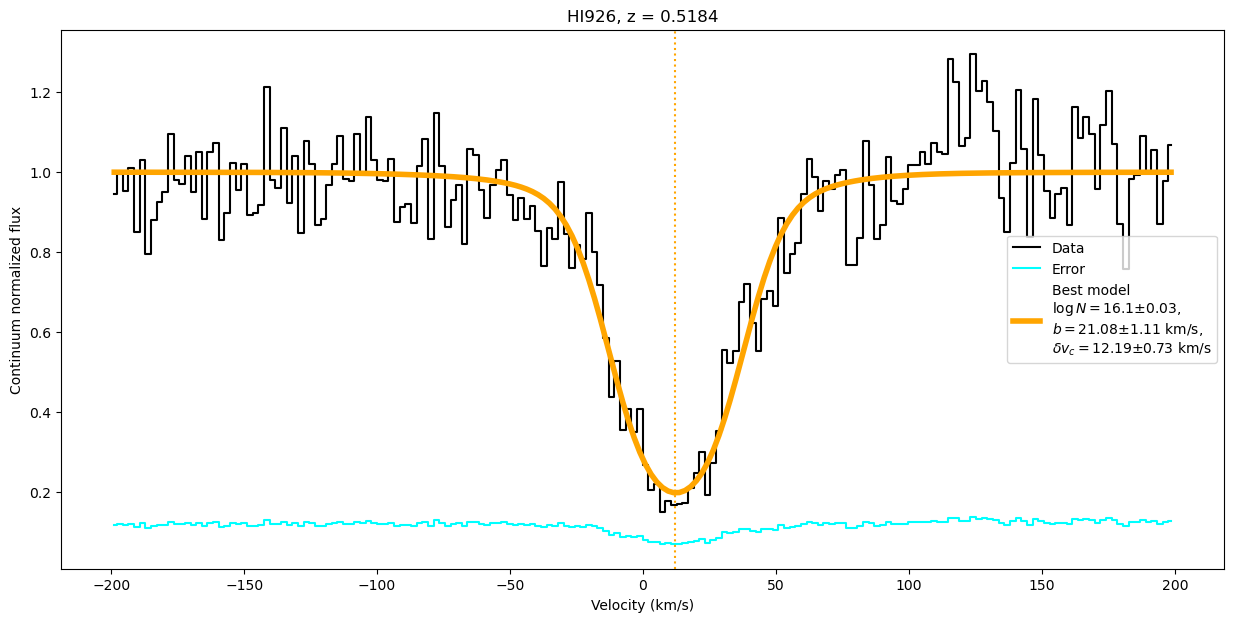

In [130]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_926_fuv.plot_best_profile(ax, legend=True)

## HI 920
Get HI 920 from COS FUV

In [206]:
hi_920_fuv = ion_transition('HI920', 82, 'FUV')

In [227]:
hi_920_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=10)

In [228]:
hi_920_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200])

In [236]:
hi_920_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-50,60], degree=1)

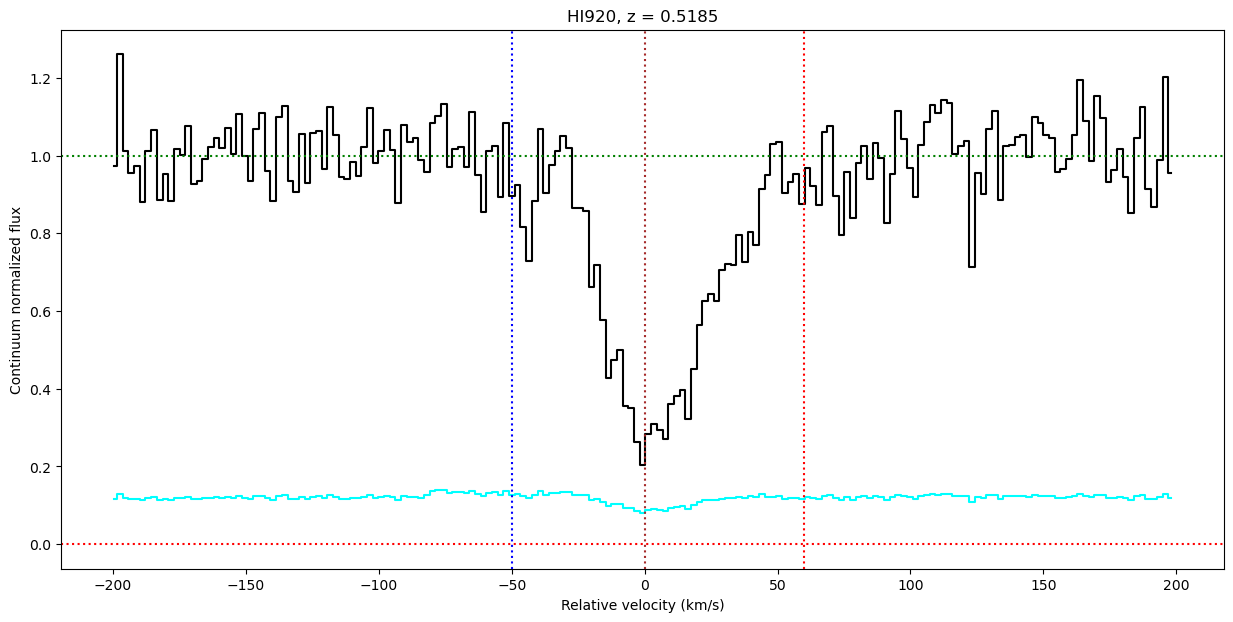

In [237]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_920_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [238]:
hi_920_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [239]:
hi_920_fuv.init_multi_voigt(init_values = np.array([[16,20,0],[15.5,20,30]]), 
                             lsf_convolve = True)

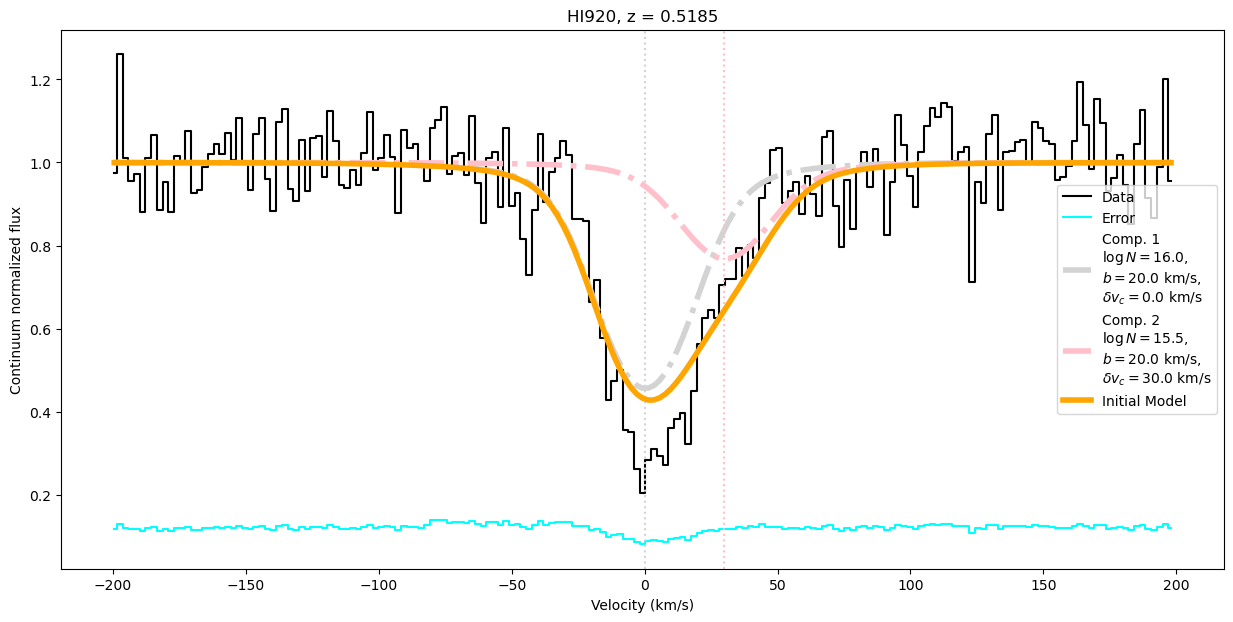

In [240]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_920_fuv.plot_init_profile(ax, legend=True)

In [241]:
hi_920_fuv.fit_multi_voigt()

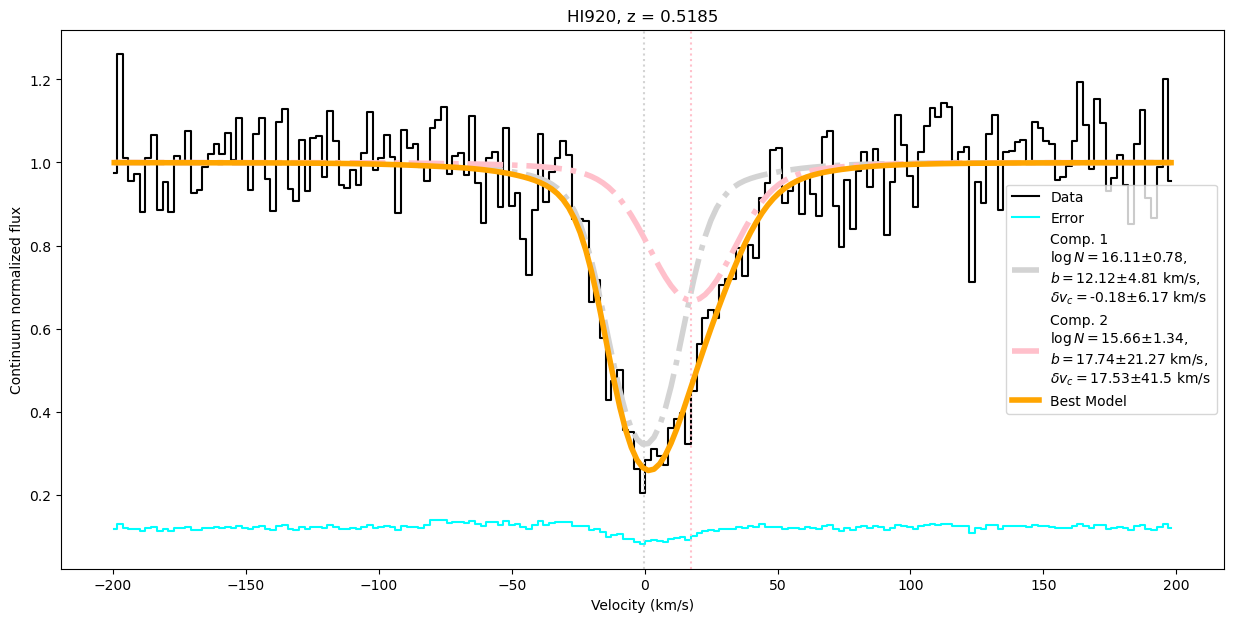

In [242]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_920_fuv.plot_best_profile(ax, legend=True)

## HI 917
Get HI 917 from COS FUV

In [243]:
hi_917_fuv = ion_transition('HI917', 82, 'FUV')

In [248]:
hi_917_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=10)

In [249]:
hi_917_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[100,200]])

In [254]:
hi_917_fuv.cont_norm_flux(nodes_fits_list, renorm=True, v_abs_range=[-30,60], degree=1)

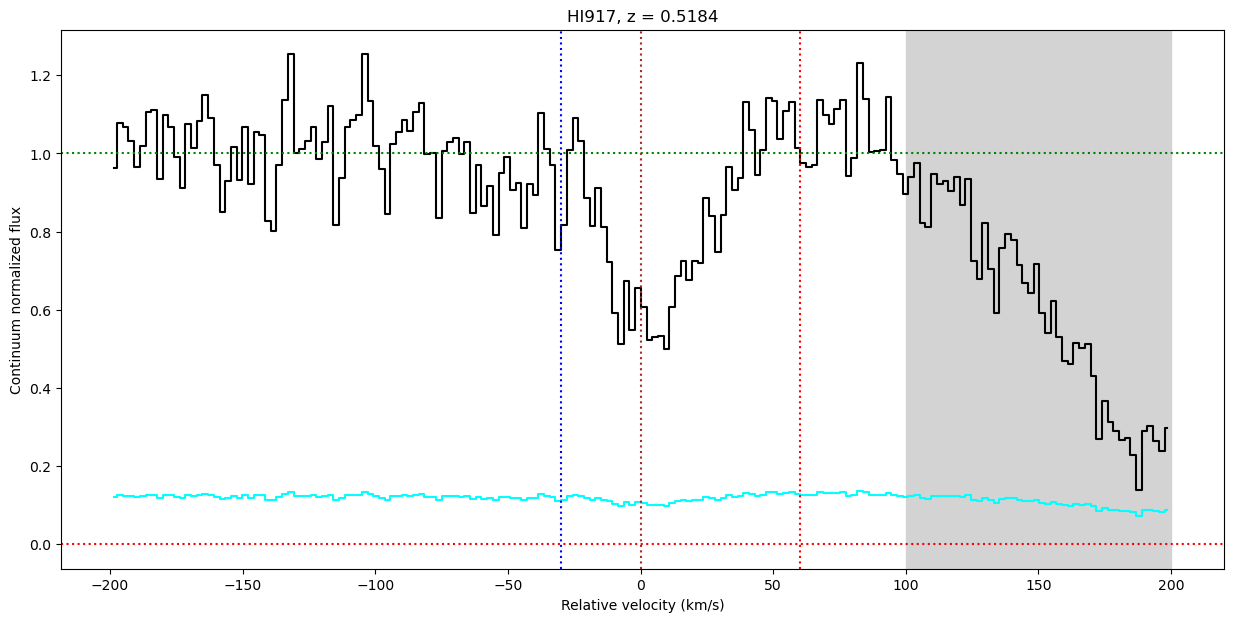

In [255]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_917_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [256]:
hi_917_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [257]:
hi_917_fuv.init_multi_voigt(init_values = hi_920_fuv.best_values, 
                             lsf_convolve = True)

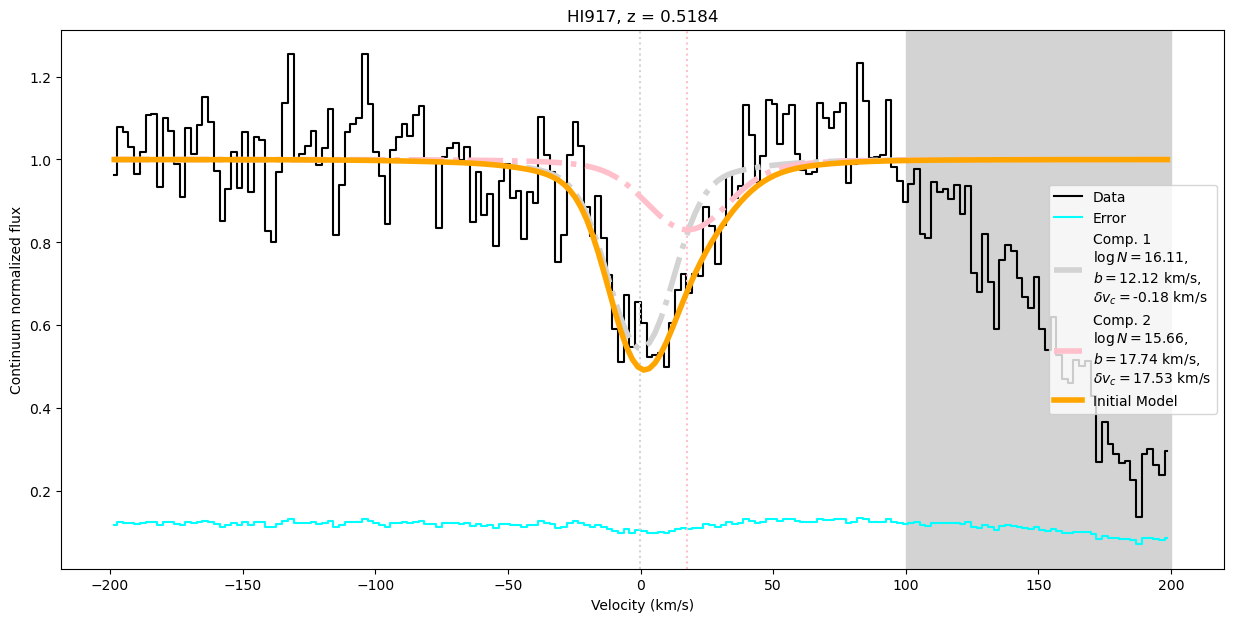

In [258]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_917_fuv.plot_init_profile(ax, legend=True)

In [259]:
hi_917_fuv.fit_multi_voigt()

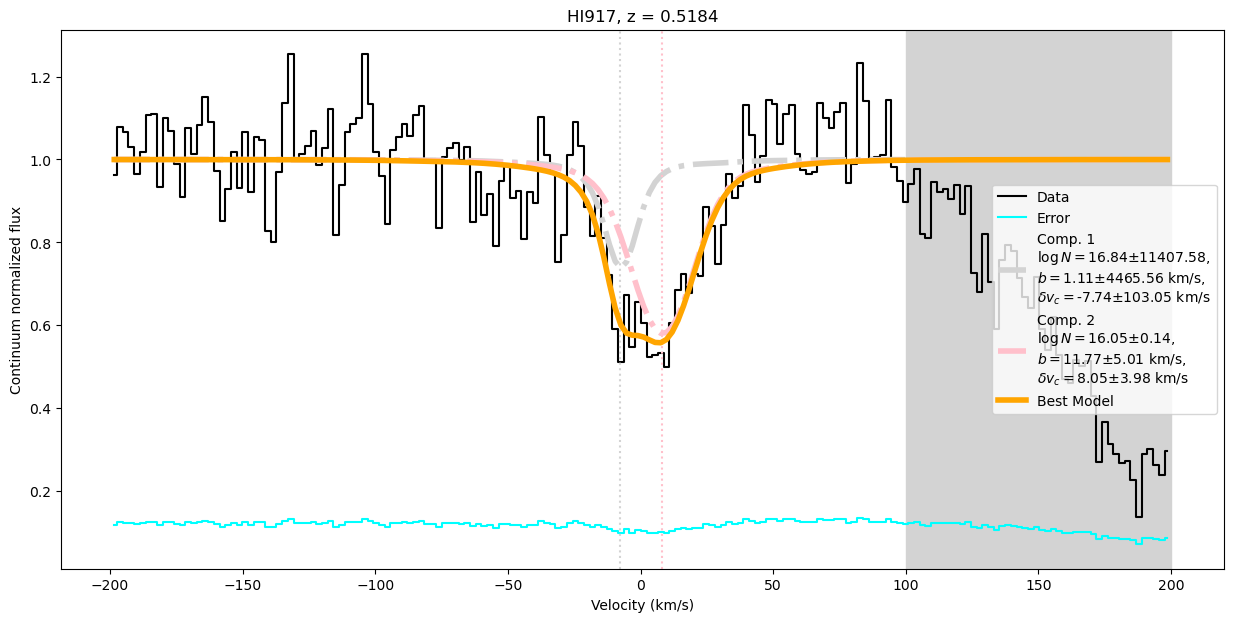

In [260]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_917_fuv.plot_best_profile(ax, legend=True)

## HI 916

In [189]:
hi_916_fuv = ion_transition('HI916', 82, 'FUV')

In [190]:
hi_916_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=0)

In [196]:
hi_916_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-200,-140]])

In [197]:
hi_916_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

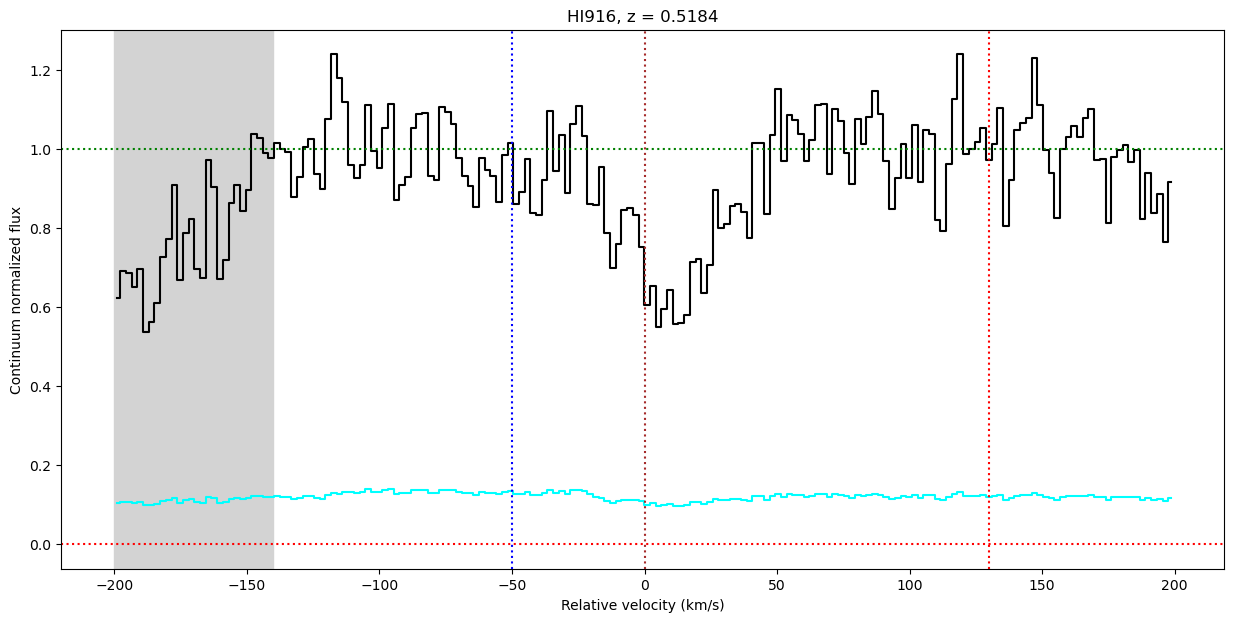

In [198]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_916_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [201]:
hi_916_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [202]:
hi_916_fuv.init_multi_voigt(init_values = np.array([[15.2,20,0]]), 
                             lsf_convolve = True)

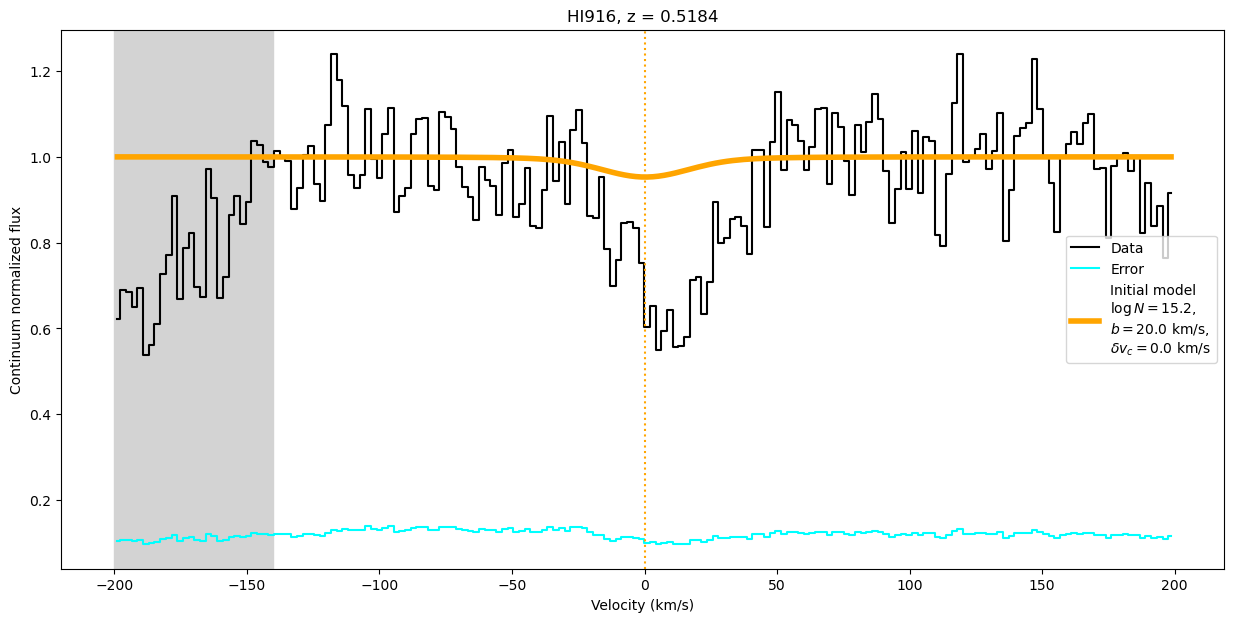

In [203]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_916_fuv.plot_init_profile(ax, legend=True)

In [204]:
hi_916_fuv.fit_multi_voigt()

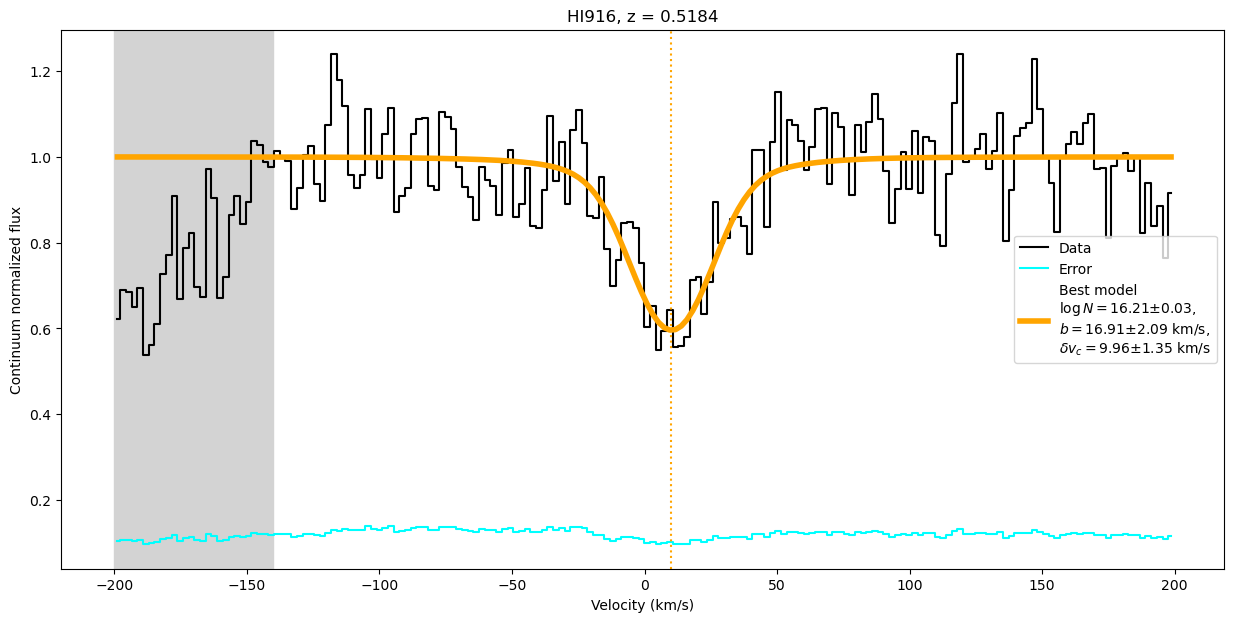

In [205]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_916_fuv.plot_best_profile(ax, legend=True)

## HI 915
Get HI 915 from COS FUV

In [189]:
hi_916_fuv = ion_transition('HI916', 82, 'FUV')

In [190]:
hi_916_fuv.grab_ion_transition_info(ids_fits_list, atomic_data_table, delta_v=0)

In [196]:
hi_916_fuv.grab_ion_transition_spec(spec_fits_list, v_range=[-200,200], masks=[[-200,-140]])

In [197]:
hi_916_fuv.cont_norm_flux(nodes_fits_list, renorm=False, v_abs_range=[-50,130], degree=1)

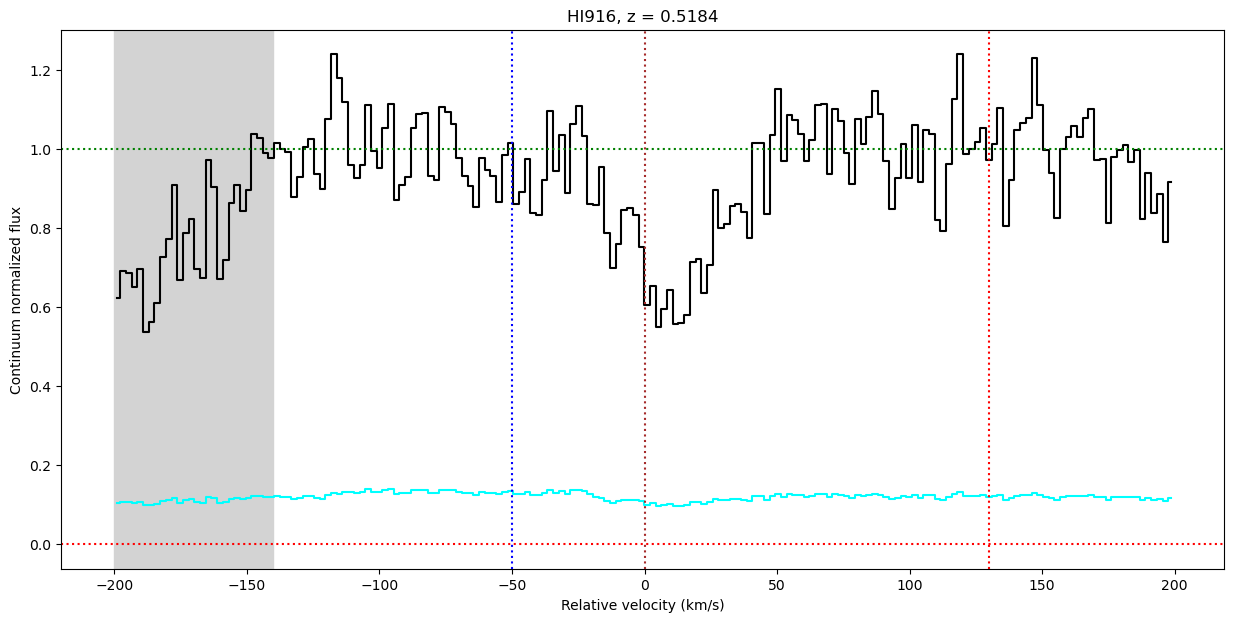

In [198]:
fig, ax = plt.subplots(1, figsize=(15,7))

hi_916_fuv.plot_ion_transition_spec(ax, draw_cont_bounds=True)

In [201]:
hi_916_fuv.grab_ion_transition_lsf(lsf_fits_list)

In [202]:
hi_916_fuv.init_multi_voigt(init_values = np.array([[15.2,20,0]]), 
                             lsf_convolve = True)

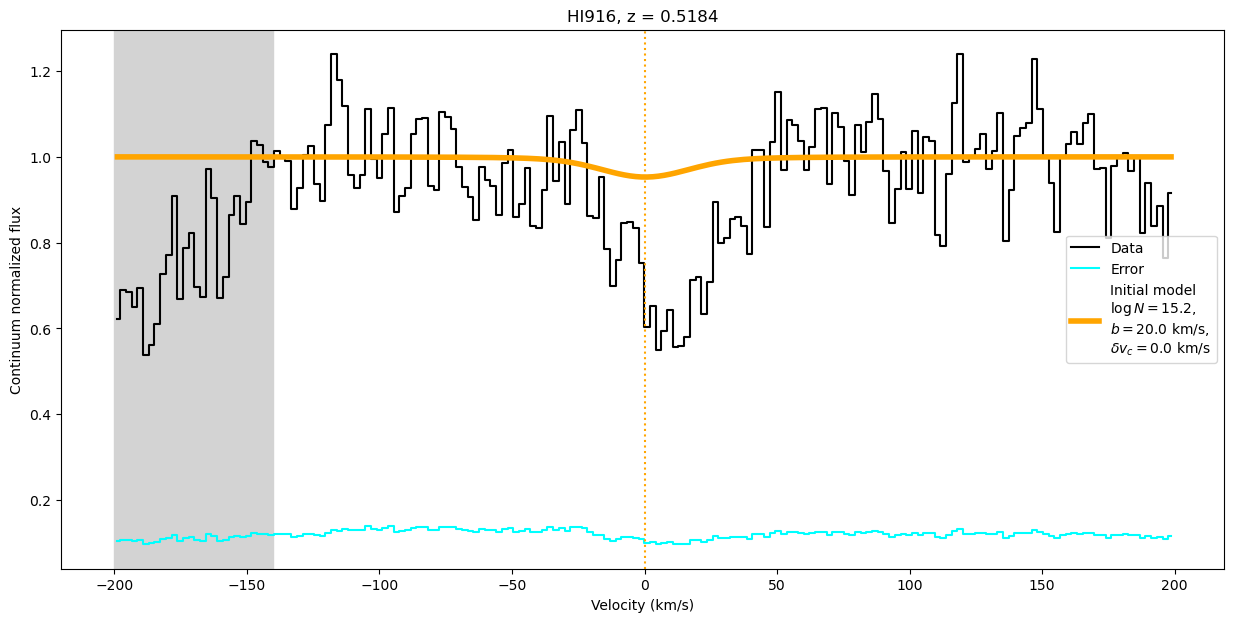

In [203]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_916_fuv.plot_init_profile(ax, legend=True)

In [204]:
hi_916_fuv.fit_multi_voigt()

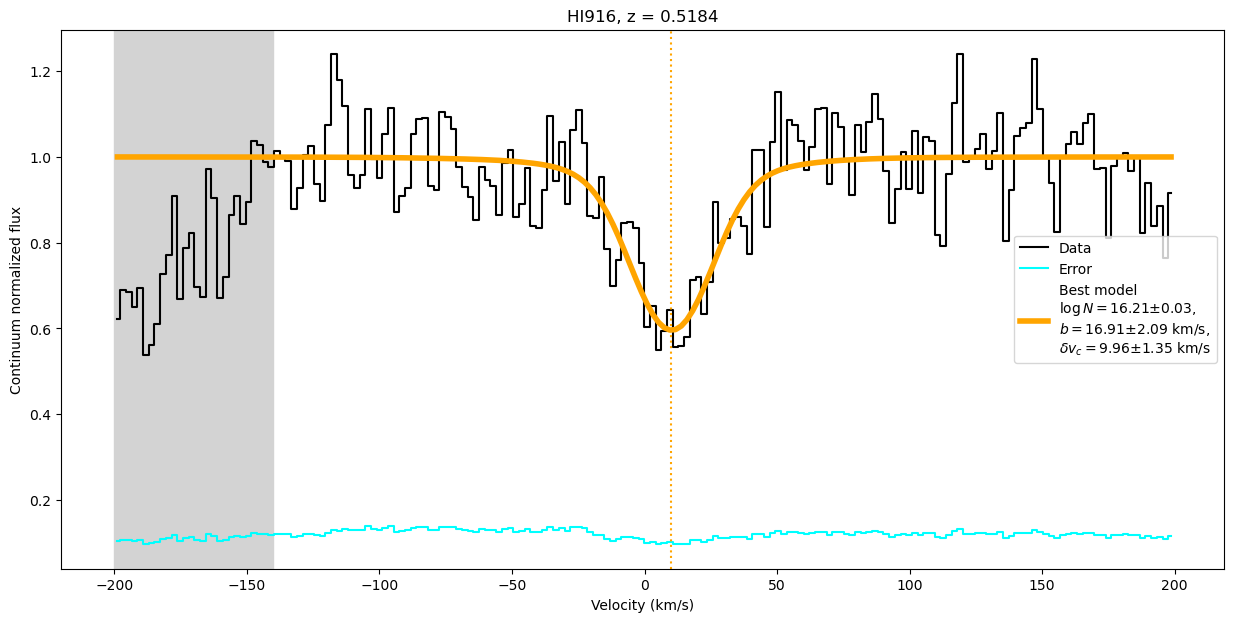

In [205]:
fig, ax = plt.subplots(1, figsize=(15, 7))

hi_916_fuv.plot_best_profile(ax, legend=True)